# 1. The Main Task:
A dataset of manually-curated BCF for 779 chemicals was used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated.




## 1.1. Data definition:

1.   CAS: Chemical Abstracts Service registry number.
2.   SMILES: Simplified Molecular Input Line Entry System, a notation that allows a user to represent a chemical structure in a way that can be used by the computer.
3. nHM: Number of heavy atoms.
4. piPC09: Molecular path index based on the 09u path matrix.
5. PCD: Petitjean shape index.
6. X2Av: Average molecular information index.
7. MLOGP: Molecular LogP (partition coefficient).
8. ON1V: Onizuka's shape index.
9. N-072: Number of rotatable bonds.
10. B02[C-N]: Presence or absence of the SMARTS pattern B02[C-N].
11. F04[C-O]: Presence or absence of the SMARTS pattern F04[C-O].
12. logBCF: Logarithm of the bioconcentration factor (BCF), which is the ratio of a chemical's concentration in an organism to its concentration in the surrounding environment.
13. Class: The target variable, representing the mechanism of bioconcentration. It can take one of three classes: (1) mainly stored within lipid tissues, (2) has additional storage sites (e.g., proteins), or (3) is metabolized/eliminated.



## 1. EXPLORATORY DATA ANALYSIS (EDA)

- **Read The Data (Load the data into a Dataframe)**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('qsar_bioconcentration.csv')
df.head()

,CAS,SMILES,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF,Class
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],0.0,0.0,1.49,0.14,1.35,0.72,0,1.0,5,0.74,1.0
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],0.0,0.0,1.47,0.14,1.70,0.88,0,1.0,5,0.93,1.0
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,0.0,0.0,1.20,0.25,4.14,2.06,0,0.0,0,3.24,3.0
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],0.0,0.0,1.69,0.13,NaN,0.79,0,1.0,8,-0.40,3.0
4,100-40-3,C=CC1CCC=CC1,0.0,0.0,0.52,0.25,2.65,1.31,0,0.0,0,2.24,1.0


- **Data shape**

In [2]:
df.shape

(782, 13)

- **Data features**

In [3]:
df.columns

Index(['CAS', 'SMILES', 'nHM', 'piPC09', 'PCD', 'X2Av', 'MLOGP', 'ON1V',
       'N-072', 'B02[C-N]', 'F04[C-O]', 'logBCF', 'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       781 non-null    object 
 1   SMILES    780 non-null    object 
 2   nHM       780 non-null    float64
 3   piPC09    779 non-null    float64
 4   PCD       782 non-null    float64
 5   X2Av      776 non-null    float64
 6   MLOGP     779 non-null    object 
 7   ON1V      780 non-null    object 
 8   N-072     781 non-null    object 
 9   B02[C-N]  780 non-null    float64
 10  F04[C-O]  782 non-null    int64  
 11  logBCF    781 non-null    float64
 12  Class     779 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 79.6+ KB


# 2. Data Cleaning


In [5]:
#By setting errors=’coerce’, we’ll transform the non-numeric(string) values into NaN in the column MLOGP, ON1V, N-072
considred_columns=['MLOGP','ON1V','N-072']
for i in considred_columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       781 non-null    object 
 1   SMILES    780 non-null    object 
 2   nHM       780 non-null    float64
 3   piPC09    779 non-null    float64
 4   PCD       782 non-null    float64
 5   X2Av      776 non-null    float64
 6   MLOGP     778 non-null    float64
 7   ON1V      779 non-null    float64
 8   N-072     780 non-null    float64
 9   B02[C-N]  780 non-null    float64
 10  F04[C-O]  782 non-null    int64  
 11  logBCF    781 non-null    float64
 12  Class     779 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 79.6+ KB


In [6]:
# we drop unnecessary columns that we don't need it to build the model
columns_to_delete=['CAS','SMILES']
df= df.drop(columns_to_delete, axis=1)

In [7]:
# Checking Missing Values
df.isna().sum()

nHM         2
piPC09      3
PCD         0
X2Av        6
MLOGP       4
ON1V        3
N-072       2
B02[C-N]    2
F04[C-O]    0
logBCF      1
Class       3
dtype: int64

In [8]:
#Replacing the missing value in the "ON1V",'X2Av','MLOGP','logBCF','piPC09'column with its mode
conclude_columns=['piPC09','X2Av','MLOGP','ON1V','logBCF']
for i in conclude_columns:
    median = df[i].median()
    df[i] = df[i].fillna(median)
df.isna().sum()

nHM         2
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       2
B02[C-N]    2
F04[C-O]    0
logBCF      0
Class       3
dtype: int64

In [9]:
# drop rows which contains NaN in other columns
df.dropna(inplace=True)
df.isna().sum()

nHM         0
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       0
B02[C-N]    0
F04[C-O]    0
logBCF      0
Class       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 781
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nHM       773 non-null    float64
 1   piPC09    773 non-null    float64
 2   PCD       773 non-null    float64
 3   X2Av      773 non-null    float64
 4   MLOGP     773 non-null    float64
 5   ON1V      773 non-null    float64
 6   N-072     773 non-null    float64
 7   B02[C-N]  773 non-null    float64
 8   F04[C-O]  773 non-null    int64  
 9   logBCF    773 non-null    float64
 10  Class     773 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 72.5 KB


In [11]:
# Fix the columns Type 'nHM','N-072','B02[C-N]','Class' from float64 to int64
Columns1=['nHM','N-072','B02[C-N]','Class']
for i in Columns1:
    df[i] = df[i].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 781
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nHM       773 non-null    int64  
 1   piPC09    773 non-null    float64
 2   PCD       773 non-null    float64
 3   X2Av      773 non-null    float64
 4   MLOGP     773 non-null    float64
 5   ON1V      773 non-null    float64
 6   N-072     773 non-null    int64  
 7   B02[C-N]  773 non-null    int64  
 8   F04[C-O]  773 non-null    int64  
 9   logBCF    773 non-null    float64
 10  Class     773 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 72.5 KB


In [12]:
#cheking for the sum os nan values
df.isna().sum().sum()

0

In [13]:
#cheking for duplicated rows
len(df[df.duplicated()])

4

In [14]:
# Drop duplicated rows
df = df.drop_duplicates()
len(df[df.duplicated()])

0

<Axes: ylabel='count'>

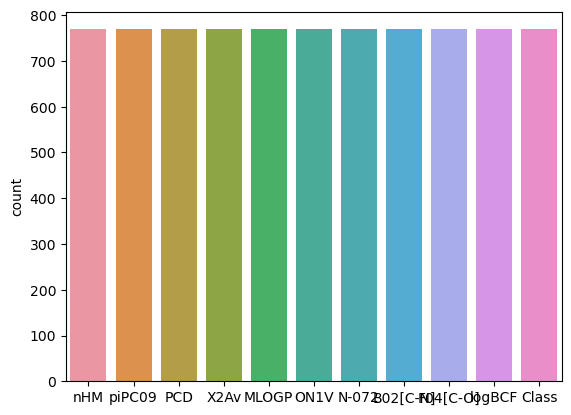

In [15]:
sns.countplot(data=df)

# 3. Understanding the data set:

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


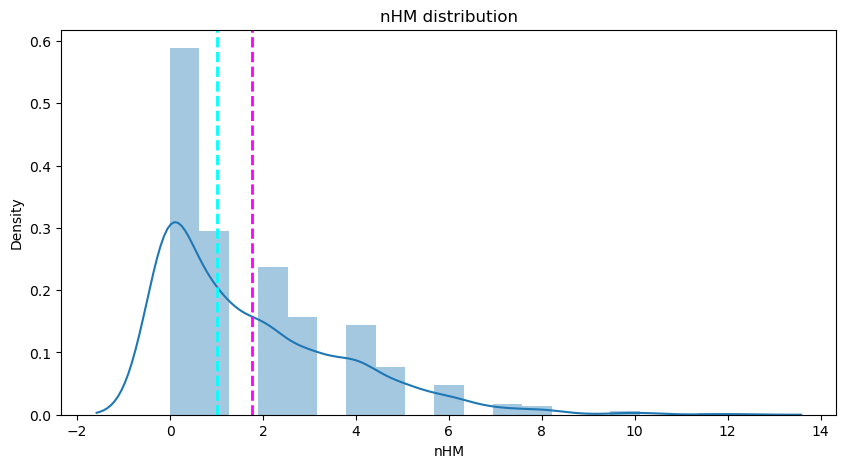

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


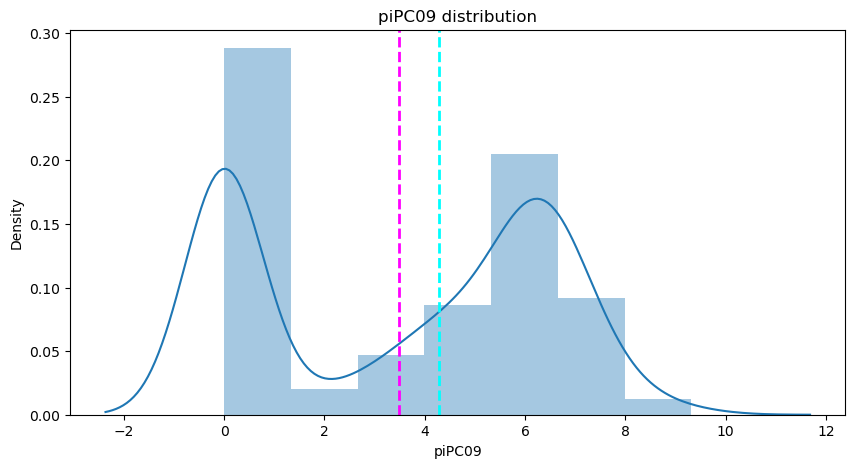

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


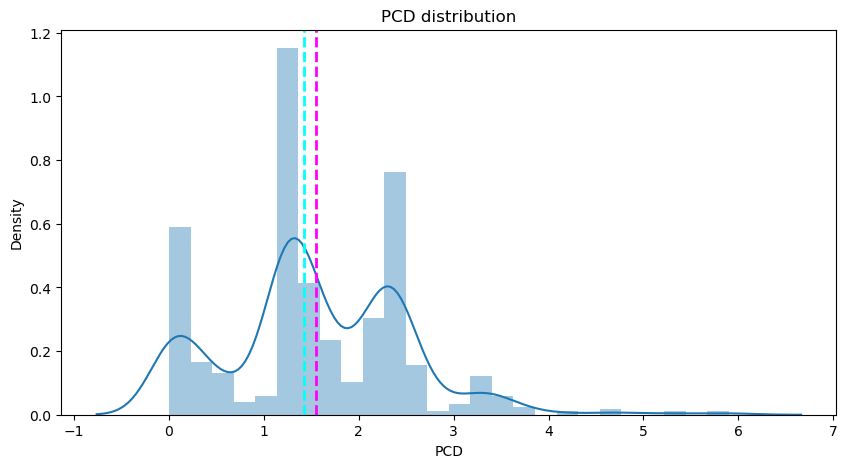

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


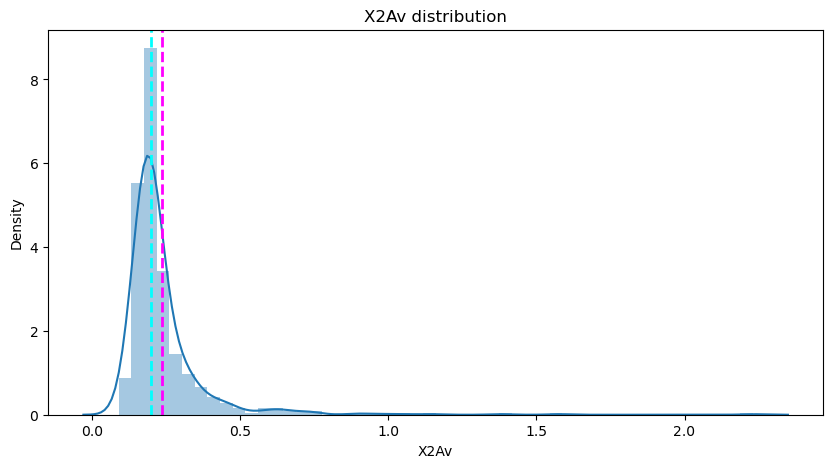

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


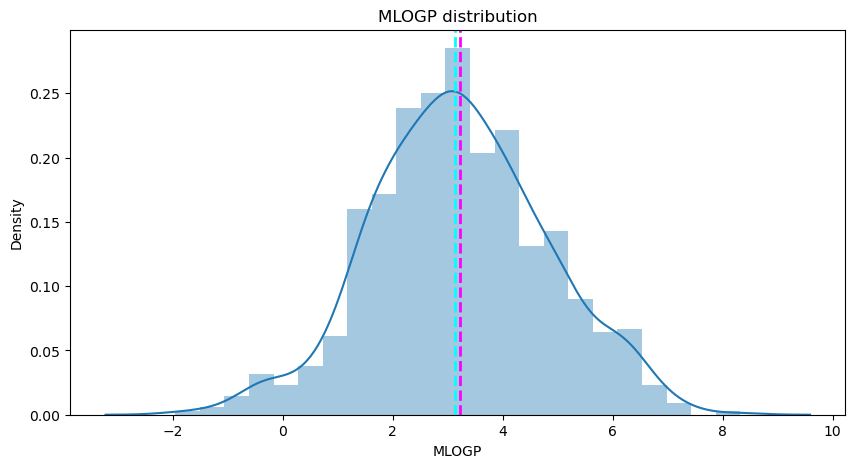

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


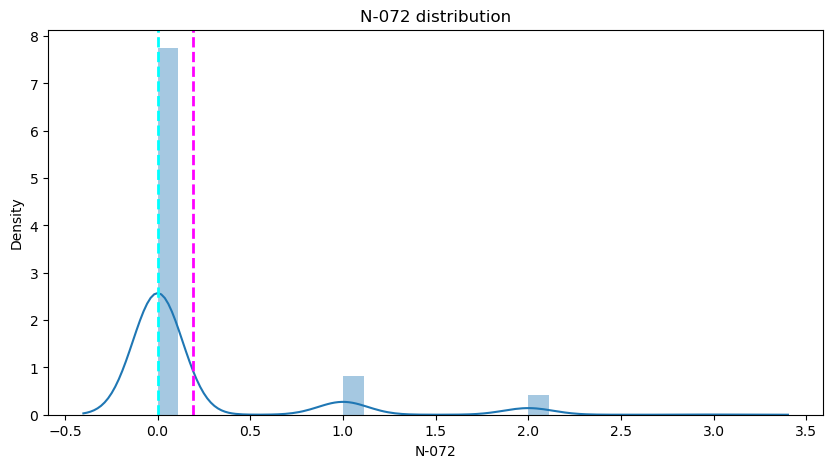

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


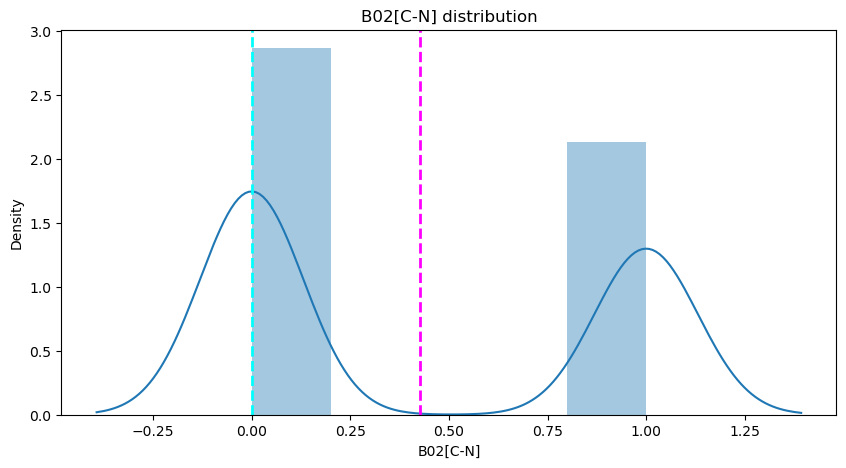

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


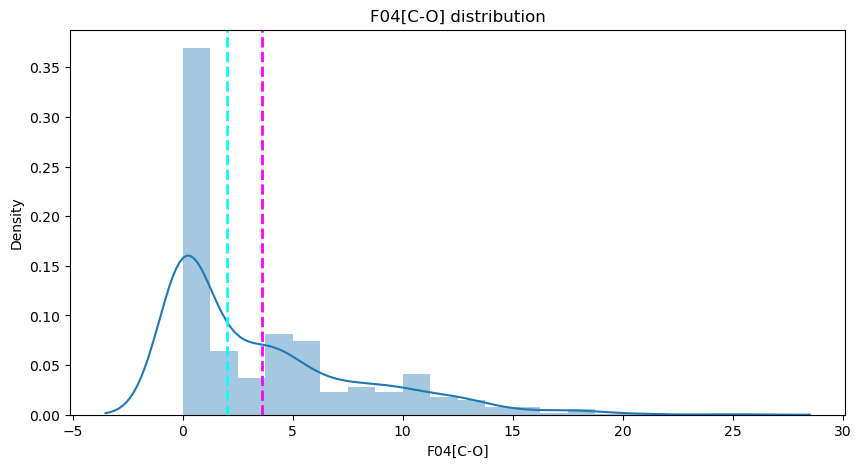

C:\Users\HP VICTUS\AppData\Local\Temp\ipykernel_5096\848987510.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


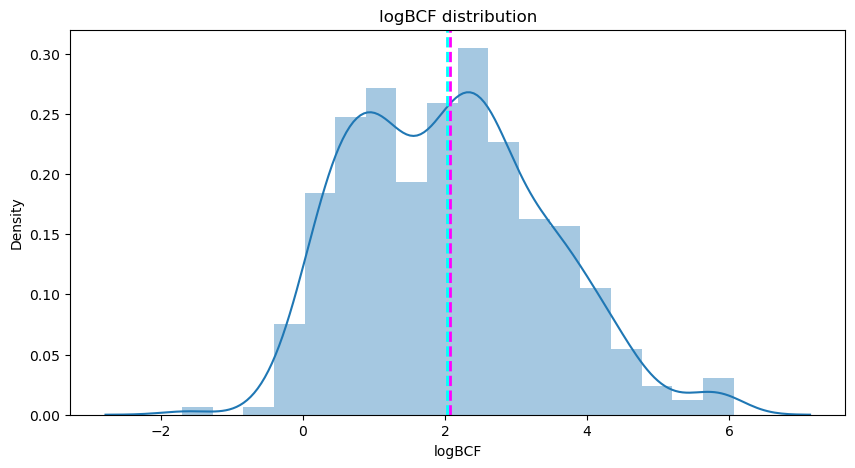

In [16]:
# Visualizing the data distribution
for i in ['nHM','piPC09','PCD','X2Av','MLOGP','N-072','B02[C-N]','F04[C-O]','logBCF']:
      plt.figure(figsize=(10,5))
      sns.distplot(df[i])
      plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
      plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
      plt.title(i+' distribution')
      plt.show()


- **Evaluating the Skewness**

In [17]:
print("Skewness:", df.skew())

Skewness: nHM         1.301275
piPC09     -0.098237
PCD         0.487714
X2Av        6.087362
MLOGP       0.032994
ON1V        1.510999
N-072       2.732633
B02[C-N]    0.297694
F04[C-O]    1.377001
logBCF      0.382573
Class       0.552309
dtype: float64


In [18]:
# describing our database
df.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF,Class
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,1.765930,3.493233,1.552653,0.236736,3.211456,1.515761,0.188557,0.426528,3.605982,2.069454,1.733420
std,1.991475,2.976520,0.960393,0.149858,1.598383,0.834410,0.504742,0.494894,4.422894,1.354441,0.920224
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000,-1.700000,1.000000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.920000,0.000000,0.000000,0.000000,0.990000,1.000000
50%,1.000000,4.275000,1.420000,0.200000,3.135000,1.270000,0.000000,0.000000,2.000000,2.030000,1.000000
75%,3.000000,6.259000,2.290000,0.240000,4.240000,2.030000,0.000000,1.000000,6.000000,2.970000,3.000000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000,6.060000,3.000000


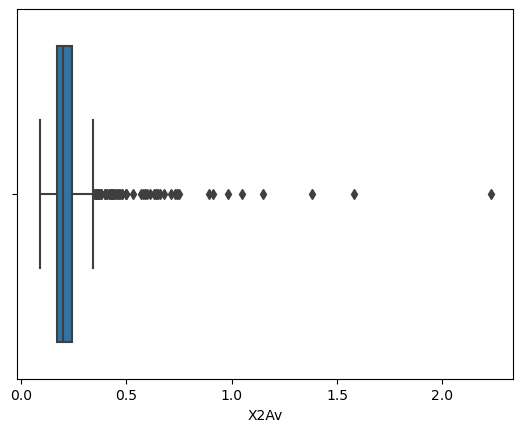


Descriptive Statistics for X2Av:
count    769.000000
mean       0.236736
std        0.149858
min        0.090000
25%        0.170000
50%        0.200000
75%        0.240000
max        2.230000
Name: X2Av, dtype: float64
lower_bound : 0.06500000000000004
upper_bound : 0.345

Outliers for X2Av:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
41     1   0.000  0.00  1.05   3.47  3.43      0         0         3    3.92   
42     2   0.000  0.00  0.98   2.23  0.39      0         0         0    0.93   
43     1   0.000  0.24  0.38   1.67  0.41      0         0         0    0.50   
45     0   0.000  0.17  0.37   3.15  1.38      0         0         0    2.81   
62     1   0.000  0.00  0.36   2.57  1.38      0         0         0    1.31   
..   ...     ...   ...   ...    ...   ...    ...       ...       ...     ...   
732    4   3.555  0.54  0.45  -0.27  1.12      1         1         1    0.72   
734    3   0.000  0.11  0.64   2.68  2.83      0         0       

In [19]:
# create boxplots to X2AV column
for column in ['X2Av']:
        sns.boxplot(x=df[column])
        plt.show()

        # Calculate the median,mean,mode and std
        stats = df[column].describe()
        print(f"\nDescriptive Statistics for {column}:")
        print(stats)

        # Highlight outliers using Tukey's method
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #print the lower_bound and upper_bound values
        print('lower_bound :' ,lower_bound)
        print('upper_bound :' ,upper_bound)

        # Locate outliers in the each column
        outliers1 = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Display the outliers
        print(f"\nOutliers for {column}:")
        print(outliers1)

- **as we see there is many outliers that it is so far from the median, so I choose that we drop rows that contain outliers to redues the skewness of this column, I used other methodes but this is the better to reduce skewness **

In [20]:
df = df[~df.index.isin(outliers1.index)]

In [21]:
df.shape

(692, 11)

In [22]:
# as we see we reduce lot of skewness in X2Av column
df.skew()

nHM         1.451606
piPC09     -0.248560
PCD         0.577689
X2Av        0.778960
MLOGP       0.062688
ON1V        1.491074
N-072       2.696196
B02[C-N]    0.162735
F04[C-O]    1.340715
logBCF      0.395991
Class       0.557320
dtype: float64

In [23]:
df.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF,Class
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,1.664740,3.741981,1.680665,0.201257,3.290824,1.512702,0.193642,0.459538,3.748555,2.111749,1.731214
std,2.002249,2.959745,0.905829,0.047383,1.556589,0.784190,0.513285,0.498721,4.485424,1.356197,0.919326
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.140000,0.000000,0.000000,0.000000,-1.700000,1.000000
25%,0.000000,0.000000,1.240000,0.170000,2.240000,0.937500,0.000000,0.000000,0.000000,1.027500,1.000000
50%,1.000000,4.758500,1.500000,0.200000,3.230000,1.270000,0.000000,0.000000,2.000000,2.060000,1.000000
75%,3.000000,6.299250,2.310000,0.220000,4.250000,1.980000,0.000000,1.000000,6.000000,2.985000,3.000000
max,12.000000,9.316000,5.900000,0.340000,8.320000,7.190000,3.000000,1.000000,25.000000,6.060000,3.000000


### - **here we choose only columns that continous vairbables i.e.,(MLOGP, ON1V, X2Av, PCD, PiP09 and logBCF) to impute them. While leaving the outliers in the discrete variables i.e.,(nHM, B02[C-N], F04[C-O]).**

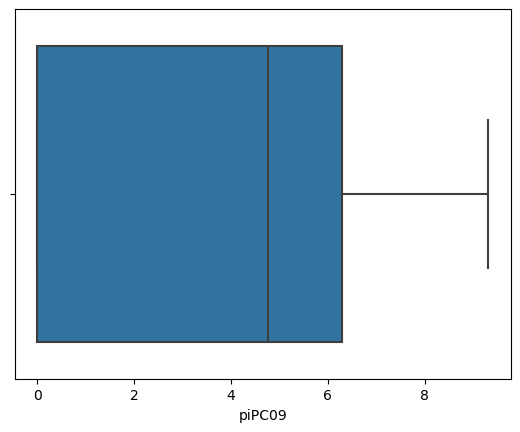


Descriptive Statistics for piPC09:
count    692.000000
mean       3.741981
std        2.959745
min        0.000000
25%        0.000000
50%        4.758500
75%        6.299250
max        9.316000
Name: piPC09, dtype: float64
lower_bound : -9.448875
upper_bound : 15.748124999999998

Outliers for piPC09:
Empty DataFrame
Columns: [nHM, piPC09, PCD, X2Av, MLOGP, ON1V, N-072, B02[C-N], F04[C-O], logBCF, Class]
Index: []


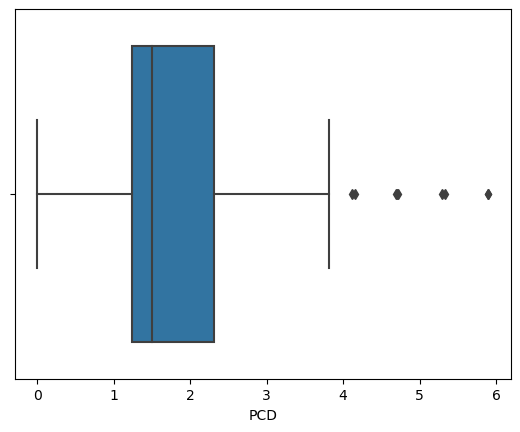


Descriptive Statistics for PCD:
count    692.000000
mean       1.680665
std        0.905829
min        0.000000
25%        1.240000
50%        1.500000
75%        2.310000
max        5.900000
Name: PCD, dtype: float64
lower_bound : -0.365
upper_bound : 3.915

Outliers for PCD:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
146    0   8.699  4.16  0.15   4.76  1.65      0         0         0    2.97   
240    0   9.298  5.29  0.15   5.55  2.06      0         0         0    2.38   
251    0   8.486  4.12  0.15   4.76  1.65      0         0         0    3.50   
260    0   8.598  4.69  0.16   5.17  1.88      0         0         0    2.41   
261    0   8.626  4.72  0.16   5.17  1.87      0         0         0    2.24   
268    0   9.194  5.90  0.15   4.68  2.20      0         1         0    2.03   
414    0   9.316  5.33  0.15   5.55  2.05      0         0         0    2.73   
442    0   9.194  5.90  0.15   5.92  2.26      0         0         0    2.80   
4

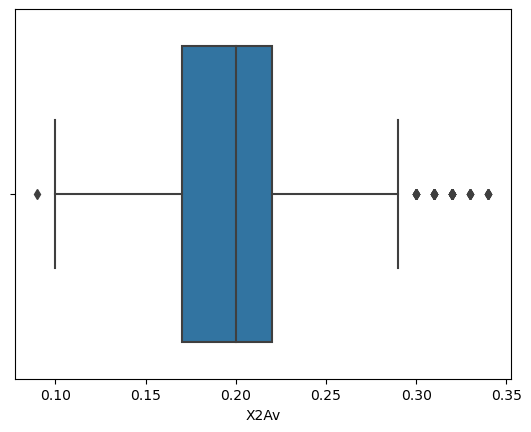


Descriptive Statistics for X2Av:
count    692.000000
mean       0.201257
std        0.047383
min        0.090000
25%        0.170000
50%        0.200000
75%        0.220000
max        0.340000
Name: X2Av, dtype: float64
lower_bound : 0.09500000000000003
upper_bound : 0.295

Outliers for X2Av:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
34     2   0.000  1.23  0.33   3.80  0.63      0         0         0    2.25   
47     2   0.000  1.23  0.33   3.80  0.63      0         0         0    2.80   
54     2   0.000  0.00  0.30   2.27  1.25      0         0         0    1.02   
60     0   0.000  0.00  0.34   3.48  1.67      0         0         0    2.32   
67     1   0.000  0.95  0.32   1.17  0.44      0         0         0    0.79   
85     3   4.660  1.32  0.32   1.89  2.13      0         0        11    1.68   
86     4   0.000  0.12  0.32   2.36  1.35      0         0         9    0.16   
87    10   6.747  2.34  0.32   7.39  1.19      0         0       

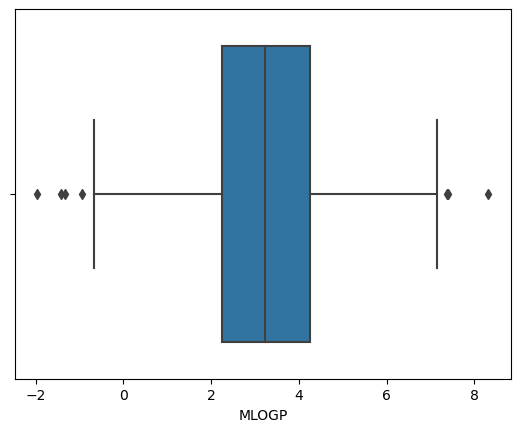


Descriptive Statistics for MLOGP:
count    692.000000
mean       3.290824
std        1.556589
min       -1.960000
25%        2.240000
50%        3.230000
75%        4.250000
max        8.320000
Name: MLOGP, dtype: float64
lower_bound : -0.7749999999999995
upper_bound : 7.265

Outliers for MLOGP:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
18     0   0.000  0.00  0.22  -0.94  1.35      0         1         6    0.35   
44     1   0.000  0.29  0.27  -1.96  0.68      0         1         5    1.40   
83     0   0.000  0.00  0.21  -1.32  0.90      0         0         0    0.03   
87    10   6.747  2.34  0.32   7.39  1.19      0         0         2    2.29   
205    0   4.605  0.03  0.10   8.32  2.40      0         0         2    2.65   
249   10   6.988  2.38  0.21   7.37  1.17      0         0         0    4.24   
532    1   0.000  0.24  0.29  -1.43  0.21      2         0         0    0.05   

     Class  
18       1  
44       2  
83       1  
87       

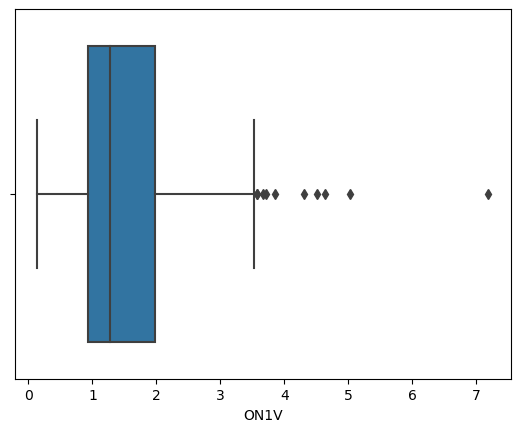


Descriptive Statistics for ON1V:
count    692.000000
mean       1.512702
std        0.784190
min        0.140000
25%        0.937500
50%        1.270000
75%        1.980000
max        7.190000
Name: ON1V, dtype: float64
lower_bound : -0.62625
upper_bound : 3.54375

Outliers for ON1V:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
91     0   5.420  1.37  0.22   5.43  5.02      0         0        18    2.38   
162    0   5.720  0.46  0.22   4.25  4.51      1         1        10    3.07   
312    1   5.485  1.64  0.24   5.65  3.86      0         0        18    2.73   
317    1   2.565  0.08  0.31   4.27  4.31      0         0        10    0.62   
339    0   6.081  1.36  0.23   6.63  7.19      0         0        25    0.60   
549    0   3.850  0.90  0.26   3.97  3.58      0         0         7    2.66   
561    0   4.716  1.08  0.25   3.83  3.57      0         1         1    3.03   
590    1   4.500  0.69  0.27   2.30  3.71      0         1         9    0.

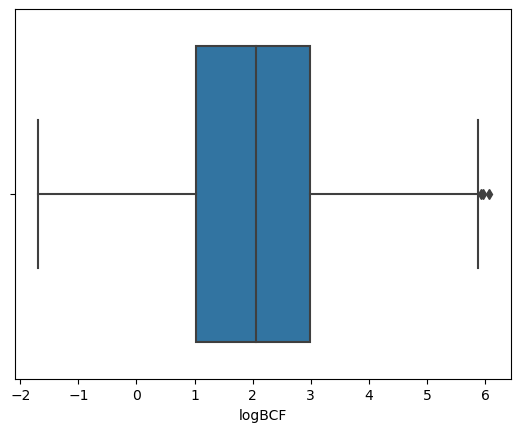


Descriptive Statistics for logBCF:
count    692.000000
mean       2.111749
std        1.356197
min       -1.700000
25%        1.027500
50%        2.060000
75%        2.985000
max        6.060000
Name: logBCF, dtype: float64
lower_bound : -1.9087499999999997
upper_bound : 5.92125

Outliers for logBCF:
     nHM  piPC09   PCD  X2Av  MLOGP  ON1V  N-072  B02[C-N]  F04[C-O]  logBCF  \
334    6   6.751  2.29  0.21   6.47  1.19      0         0         0    5.97   
360    7   6.724  2.33  0.21   6.70  1.19      0         0         0    6.06   
435    7   6.654  2.35  0.21   6.70  1.19      0         0         0    5.93   

     Class  
334      2  
360      2  
435      2  


In [24]:
# Loop through each column and create boxplots
# Specify the columns to exclude
exclude_columns = ['nHM','N-072', 'B02[C-N]','F04[C-O]', 'Class']
for column in df.columns:
    if column not in exclude_columns:

        sns.boxplot(x=df[column])
        plt.show()

        # Calculate the median,mean,mode and std
        stats = df[column].describe()
        print(f"\nDescriptive Statistics for {column}:")
        print(stats)

        # Highlight outliers using Tukey's method
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        print('lower_bound :' ,lower_bound)
        print('upper_bound :' ,upper_bound)

        # Locate outliers in the each column
        outliers1 = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Display the outliers
        print(f"\nOutliers for {column}:")
        print(outliers1)

In [25]:
df.skew()

nHM         1.451606
piPC09     -0.248560
PCD         0.577689
X2Av        0.778960
MLOGP       0.062688
ON1V        1.491074
N-072       2.696196
B02[C-N]    0.162735
F04[C-O]    1.340715
logBCF      0.395991
Class       0.557320
dtype: float64

In [26]:
# Replace outliers with median, with specified columns
for column in ['PCD','piPC09','X2Av']:
        # Calculate the IQR (Interquartile Range)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

In [49]:
#replace values greater than 3 in the column ON1V with the median is useful than IQR method to reduce skewness
df["ON1V"] = df["ON1V"].mask(df["ON1V"] >3, median)

In [28]:
df.skew()

nHM         1.451606
piPC09     -0.248560
PCD         0.000422
X2Av        0.356369
MLOGP       0.062688
ON1V        0.557327
N-072       2.696196
B02[C-N]    0.162735
F04[C-O]    1.340715
logBCF      0.395991
Class       0.557320
dtype: float64

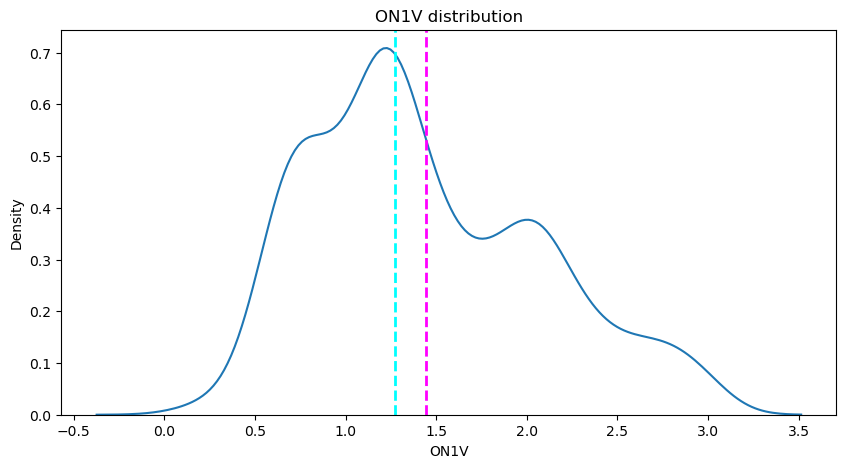

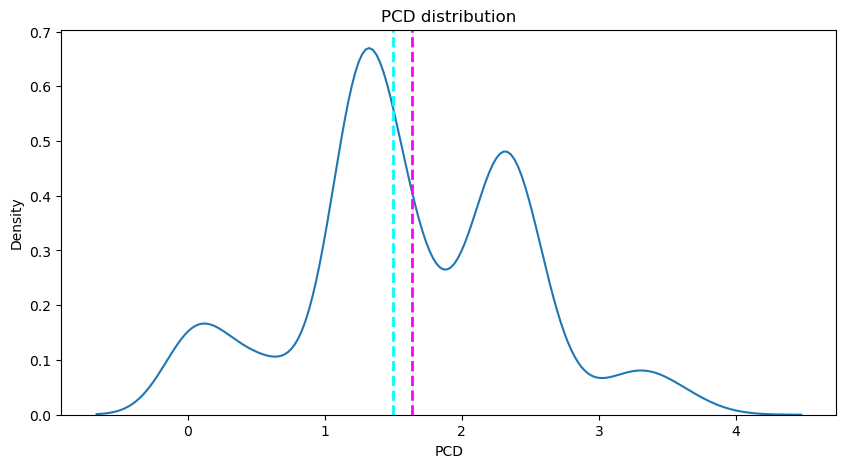

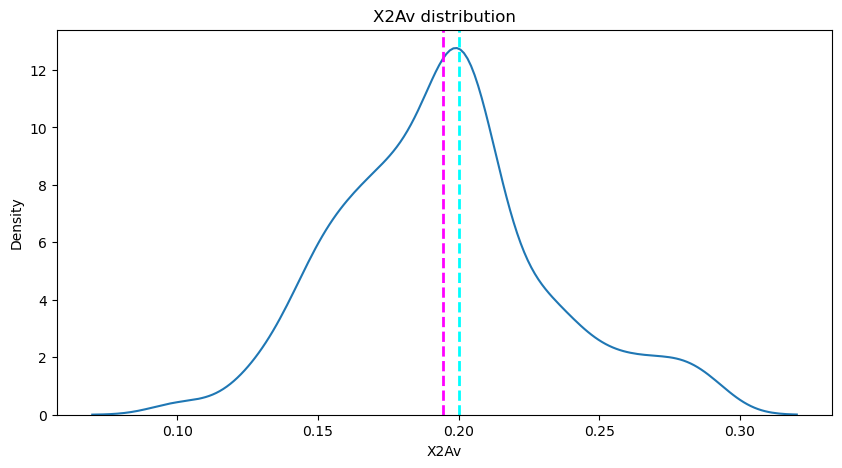

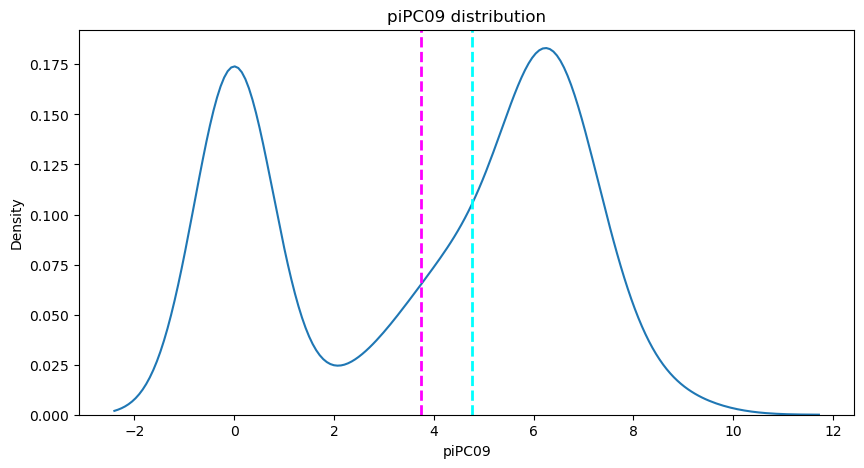

In [29]:
for i in ['ON1V','PCD','X2Av','piPC09']:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[i])
    plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(i+' distribution')
    plt.show()

- **Checking the balance of our input variables (excluding categorical variables)**

<Axes: xlabel='Class', ylabel='count'>

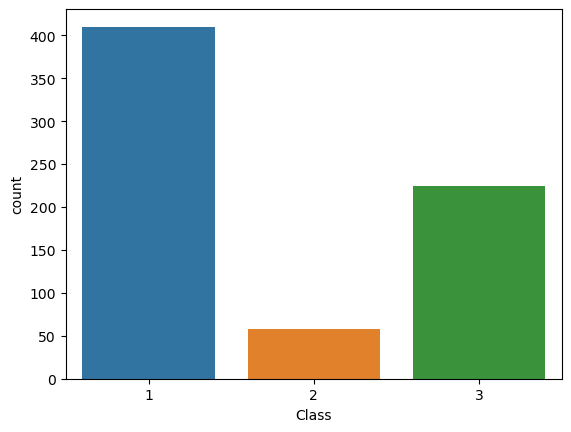

In [30]:
#We can see that more thn half of the molecules (CAS number or smile) are labeled to Class 1,
# this refers to an imbalance in the distribution of our dataset
sns.countplot(x='Class', data=df)

In [31]:
df['Class'].value_counts()

Class
1    410
3    224
2     58
Name: count, dtype: int64

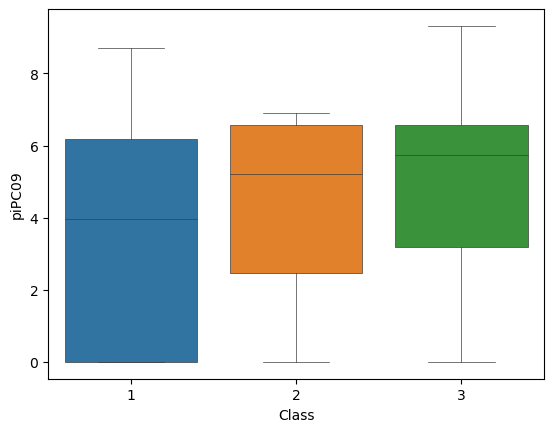

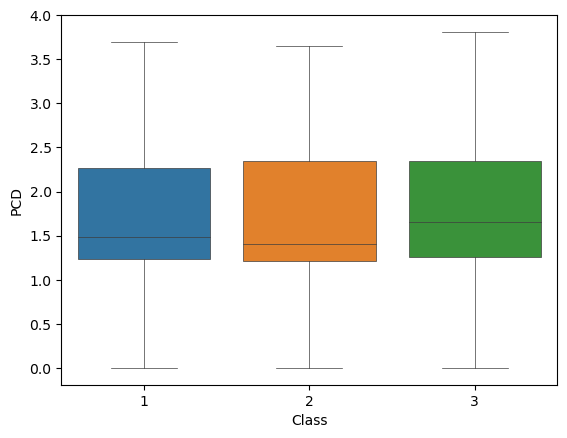

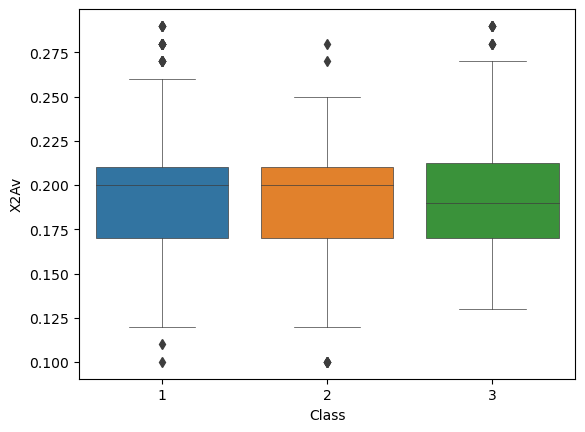

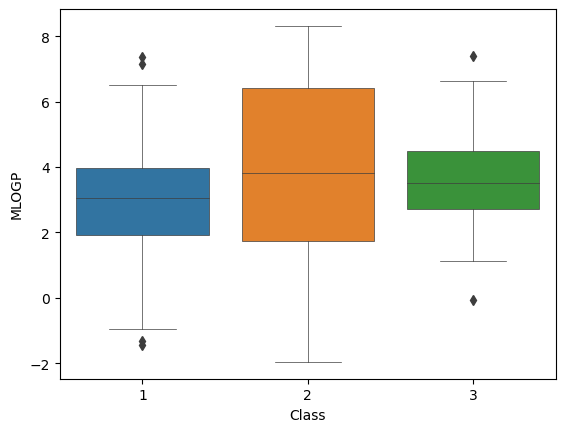

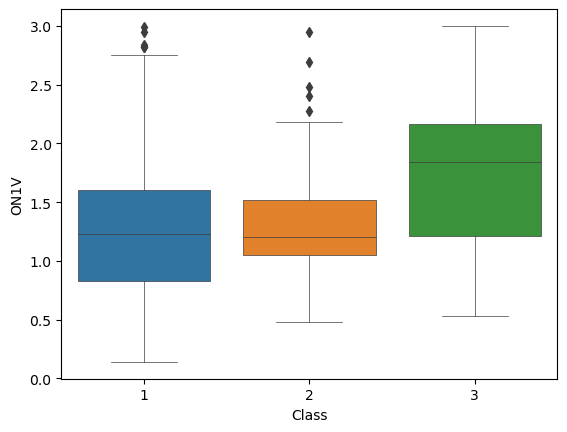

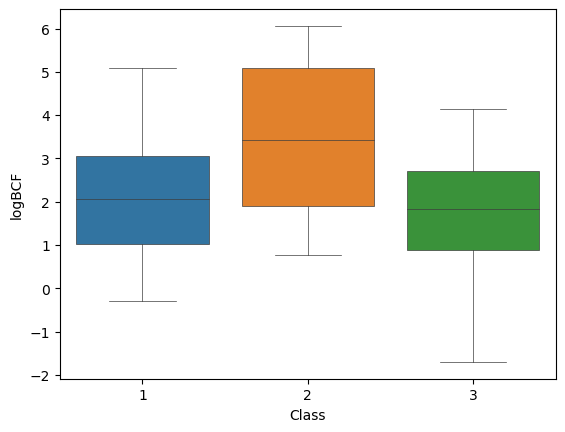

In [32]:
# Boxplot based on category
for i in df.columns:
    if i not in exclude_columns:
            sns.boxplot(data=df, x='Class',y=i, fliersize=5, linewidth=0.5),;
            plt.show()

# **Building the model and compare the 4 SK-Learn ML algorithms**

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef

from sklearn.preprocessing import StandardScaler

In [34]:
# Serarating inputs from targets our target here is Class
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **cheking for shape train and test**

In [35]:
X_train.shape

(553, 10)

In [36]:
 X_test.shape

(139, 10)

In [37]:
# Craete and Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

recall = recall_score(y_test, y_pred, average='micro')
print("Recall :", recall)

f1 = f1_score(y_test, y_pred, average='micro')
print("f1 :", f1)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)
report = classification_report(y_test, y_pred)
print("report :", report)


Recall : 0.8057553956834532
f1 : 0.8057553956834532
Accuracy : 0.8057553956834532
Precision : 0.8057553956834532
report :               precision    recall  f1-score   support

           1       0.77      0.93      0.84        75
           2       1.00      0.36      0.53        11
           3       0.86      0.72      0.78        53

    accuracy                           0.81       139
   macro avg       0.88      0.67      0.72       139
weighted avg       0.82      0.81      0.80       139



In [39]:
# Standardize features (optional but often recommended for logistic regression)
# The fit_transform method computes the mean and standard deviation of each feature in the training set
# and standardizes the features accordingly.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Craete and Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [42]:
# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)

recall = recall_score(y_test, y_pred, average='micro')
print("Recall :", recall)

f1 = f1_score(y_test, y_pred, average='micro')
print("f1 :", f1)

report1 = classification_report(y_test, y_pred)
print("report :", report1)

Accuracy : 0.7482014388489209
Precision : 0.7482014388489209
Recall : 0.7482014388489209
f1 : 0.7482014388489209
report :               precision    recall  f1-score   support

           1       0.73      0.88      0.80        75
           2       1.00      0.09      0.17        11
           3       0.79      0.70      0.74        53

    accuracy                           0.75       139
   macro avg       0.84      0.56      0.57       139
weighted avg       0.77      0.75      0.72       139



In [43]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)

recall = recall_score(y_test, y_pred, average='micro')
print("Recall :", recall)

f1 = f1_score(y_test, y_pred, average='micro')
print("f1 :", f1)

report = classification_report(y_test, y_pred)
print("report :", report)

Accuracy : 0.7194244604316546
Precision : 0.7194244604316546
Recall : 0.7194244604316546
f1 : 0.7194244604316546
report :               precision    recall  f1-score   support

           1       0.70      0.88      0.78        75
           2       1.00      0.18      0.31        11
           3       0.74      0.60      0.67        53

    accuracy                           0.72       139
   macro avg       0.82      0.56      0.59       139
weighted avg       0.74      0.72      0.70       139



In [46]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)

recall = recall_score(y_test, y_pred, average='micro')
print("Recall :", recall)

f1 = f1_score(y_test, y_pred, average='micro')
print("f1 :", f1)

report = classification_report(y_test, y_pred)
print("report :", report)

Accuracy : 0.7194244604316546
Precision : 0.7194244604316546
Recall : 0.7194244604316546
f1 : 0.7194244604316546
report :               precision    recall  f1-score   support

           1       0.69      0.89      0.78        75
           2       1.00      0.36      0.53        11
           3       0.76      0.55      0.64        53

    accuracy                           0.72       139
   macro avg       0.82      0.60      0.65       139
weighted avg       0.74      0.72      0.71       139

